In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('olx_cars_final_4.csv',index_col=None)
df

,Model,Fuel Type,Mileage,Owner,Location,Price
0,Tata Indigo Ecs (2010),PETROL,65000.0 KM,2nd,"Shastri Nagar, Delhi","₹ 1,10,000"
1,Maruti Suzuki Swift Dzire (2018),DIESEL,32000.0 KM,1st,"SR Nagar Colony, Tiruchirappalli","₹ 7,90,000"
2,Maruti Suzuki Ertiga (2018),DIESEL,48000.0 KM,1st,"Noida Extension, Noida","₹ 7,35,000"
3,Hyundai I10 (2013),PETROL,68000.0 KM,2nd,"Rohini, Delhi","₹ 2,25,000"
4,Tata Nano (2015),PETROL,22000.0 KM,1st,"Sikar Industrial Area, Sikar","₹ 1,10,000"
...,...,...,...,...,...,...
4692,Maruti Suzuki Swift (2011),DIESEL,70000.0 KM,--,"Laxman Puri, Lucknow","₹ 3,50,000"
4693,Toyota Fortuner (2009),DIESEL,"140,000 KM",--,"Laxman Puri, Lucknow","₹ 9,50,000"
4694,Renault Kwid (2021),PETROL,4000.0 KM,1st,"Abu Lane, Meerut","₹ 4,25,000"
4695,Maruti Suzuki Ignis (2019),PETROL,17690.0 KM,1st,"Indirapuram, Ghaziabad","₹ 5,25,000"


### Descriptive Analysis

In [4]:
temp_df = df.copy(deep=True)
temp_df

,Model,Fuel Type,Mileage,Owner,Location,Price
0,Tata Indigo Ecs (2010),PETROL,65000.0 KM,2nd,"Shastri Nagar, Delhi","₹ 1,10,000"
1,Maruti Suzuki Swift Dzire (2018),DIESEL,32000.0 KM,1st,"SR Nagar Colony, Tiruchirappalli","₹ 7,90,000"
2,Maruti Suzuki Ertiga (2018),DIESEL,48000.0 KM,1st,"Noida Extension, Noida","₹ 7,35,000"
3,Hyundai I10 (2013),PETROL,68000.0 KM,2nd,"Rohini, Delhi","₹ 2,25,000"
4,Tata Nano (2015),PETROL,22000.0 KM,1st,"Sikar Industrial Area, Sikar","₹ 1,10,000"
...,...,...,...,...,...,...
4692,Maruti Suzuki Swift (2011),DIESEL,70000.0 KM,--,"Laxman Puri, Lucknow","₹ 3,50,000"
4693,Toyota Fortuner (2009),DIESEL,"140,000 KM",--,"Laxman Puri, Lucknow","₹ 9,50,000"
4694,Renault Kwid (2021),PETROL,4000.0 KM,1st,"Abu Lane, Meerut","₹ 4,25,000"
4695,Maruti Suzuki Ignis (2019),PETROL,17690.0 KM,1st,"Indirapuram, Ghaziabad","₹ 5,25,000"


**We have created a copy of original dataframe to keep original data undisturbed.**

In [5]:
temp_df.shape
print("We have {} rows of data divided amongst {} features.".format(temp_df.shape[0],temp_df.shape[1]))

We have 4697 rows of data divided amongst 6 features.


In [6]:
duplicates = temp_df[temp_df.duplicated()]
duplicates

,Model,Fuel Type,Mileage,Owner,Location,Price
48,Maruti Suzuki Celerio (2017),PETROL,41000.0 KM,1st,"Rohini Sector 4, Delhi","₹ 4,25,000"
50,Volkswagen Vento (2012),DIESEL,55000.0 KM,1st,"Karol Bagh, Delhi","₹ 3,40,000"
71,Hyundai I10 (2013),PETROL,68000.0 KM,2nd,"Rohini, Delhi","₹ 2,25,000"
72,Toyota Fortuner (2015),DIESEL,128000.0 KM,1st,"Kirti Nagar, Delhi","₹ 16,50,000"
104,Tata Safari Storme (2012),DIESEL,80000.0 KM,1st,"Darshan Vihar, Delhi","₹ 4,00,000"
...,...,...,...,...,...,...
4610,Maruti Suzuki Ertiga (2014),DIESEL,55588.0 KM,1st,"Jhandewalan, Delhi","₹ 5,00,000"
4611,Chevrolet Beat (2013),DIESEL,61000.0 KM,1st,"Jhandewalan, Delhi","₹ 1,75,000"
4614,Ford Ecosport (2017),DIESEL,57000.0 KM,1st,"Adajan, Surat","₹ 7,30,000"
4621,Maruti Suzuki Vitara Brezza (2016),DIESEL,90000.0 KM,1st,"Adarsh Nagar, Faizabad","₹ 5,95,000"


**If we assume that some of the car owners belonging to same locality may have same car and same expected price, but the Mileage can not be exactly same(It may happen, but the chances are few). So instead of considering duplicated records as seperate data entries, we will rempve those duplicated records.**

In [7]:
temp_df.drop_duplicates(inplace=True)
temp_df

,Model,Fuel Type,Mileage,Owner,Location,Price
0,Tata Indigo Ecs (2010),PETROL,65000.0 KM,2nd,"Shastri Nagar, Delhi","₹ 1,10,000"
1,Maruti Suzuki Swift Dzire (2018),DIESEL,32000.0 KM,1st,"SR Nagar Colony, Tiruchirappalli","₹ 7,90,000"
2,Maruti Suzuki Ertiga (2018),DIESEL,48000.0 KM,1st,"Noida Extension, Noida","₹ 7,35,000"
3,Hyundai I10 (2013),PETROL,68000.0 KM,2nd,"Rohini, Delhi","₹ 2,25,000"
4,Tata Nano (2015),PETROL,22000.0 KM,1st,"Sikar Industrial Area, Sikar","₹ 1,10,000"
...,...,...,...,...,...,...
4692,Maruti Suzuki Swift (2011),DIESEL,70000.0 KM,--,"Laxman Puri, Lucknow","₹ 3,50,000"
4693,Toyota Fortuner (2009),DIESEL,"140,000 KM",--,"Laxman Puri, Lucknow","₹ 9,50,000"
4694,Renault Kwid (2021),PETROL,4000.0 KM,1st,"Abu Lane, Meerut","₹ 4,25,000"
4695,Maruti Suzuki Ignis (2019),PETROL,17690.0 KM,1st,"Indirapuram, Ghaziabad","₹ 5,25,000"


**We have removed the duplicated data and now we are ready for next step.**

In [8]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 0 to 4696
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      4478 non-null   object
 1   Fuel Type  4478 non-null   object
 2   Mileage    4478 non-null   object
 3   Owner      4478 non-null   object
 4   Location   4478 non-null   object
 5   Price      4478 non-null   object
dtypes: object(6)
memory usage: 244.9+ KB


In [9]:
print("Our dataset have {} number of records divided among 5 independent features and 1 target feature.".format(temp_df.shape[0]))

Our dataset have 4478 number of records divided among 5 independent features and 1 target feature.


In [10]:
temp_df.isnull().sum()

Model        0
Fuel Type    0
Mileage      0
Owner        0
Location     0
Price        0
dtype: int64

**We do not have any data missing in the format of np.nan.**

In [11]:
temp_df.isin(['--']).sum()

Model          0
Fuel Type     51
Mileage        0
Owner        173
Location       0
Price          0
dtype: int64

**We have missing values present in the format *'--'* for *Fuel Type* and *Owner* features. We will replace these values with SimpleImputer.**

In [12]:
temp_df

,Model,Fuel Type,Mileage,Owner,Location,Price
0,Tata Indigo Ecs (2010),PETROL,65000.0 KM,2nd,"Shastri Nagar, Delhi","₹ 1,10,000"
1,Maruti Suzuki Swift Dzire (2018),DIESEL,32000.0 KM,1st,"SR Nagar Colony, Tiruchirappalli","₹ 7,90,000"
2,Maruti Suzuki Ertiga (2018),DIESEL,48000.0 KM,1st,"Noida Extension, Noida","₹ 7,35,000"
3,Hyundai I10 (2013),PETROL,68000.0 KM,2nd,"Rohini, Delhi","₹ 2,25,000"
4,Tata Nano (2015),PETROL,22000.0 KM,1st,"Sikar Industrial Area, Sikar","₹ 1,10,000"
...,...,...,...,...,...,...
4692,Maruti Suzuki Swift (2011),DIESEL,70000.0 KM,--,"Laxman Puri, Lucknow","₹ 3,50,000"
4693,Toyota Fortuner (2009),DIESEL,"140,000 KM",--,"Laxman Puri, Lucknow","₹ 9,50,000"
4694,Renault Kwid (2021),PETROL,4000.0 KM,1st,"Abu Lane, Meerut","₹ 4,25,000"
4695,Maruti Suzuki Ignis (2019),PETROL,17690.0 KM,1st,"Indirapuram, Ghaziabad","₹ 5,25,000"


**We have a problem with *Mileage* and *Price* features. They should be numerical datatype but they have been imported as object datatype. We will need to convert them for effective model building.**

In [13]:
temp_df.dtypes

Model        object
Fuel Type    object
Mileage      object
Owner        object
Location     object
Price        object
dtype: object

**We need to convert *Mileage* and *Price* features to numerical datatype.**

In [14]:
temp_df.describe()

,Model,Fuel Type,Mileage,Owner,Location,Price
count,4478,4478,4478,4478,4478,4478
unique,1328,9,1360,10,2249,748
top,Maruti Suzuki Swift (2014),DIESEL,65000.0 KM,1st,"Sector 37, Gurgaon","₹ 5,50,000"
freq,26,2360,73,2574,57,69


In [15]:
print("We observe that, {} unique car models are available.".format(temp_df.describe()['Model'][1]))
print("We have most of the cars with fuel type {}.".format(temp_df.describe()['Fuel Type'][2]))

We observe that, 1328 unique car models are available.
We have most of the cars with fuel type DIESEL.


## Data Cleaning

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = temp_df.drop('Price',axis='columns')
y = temp_df['Price']

In [18]:
x.head(3)

,Model,Fuel Type,Mileage,Owner,Location
0,Tata Indigo Ecs (2010),PETROL,65000.0 KM,2nd,"Shastri Nagar, Delhi"
1,Maruti Suzuki Swift Dzire (2018),DIESEL,32000.0 KM,1st,"SR Nagar Colony, Tiruchirappalli"
2,Maruti Suzuki Ertiga (2018),DIESEL,48000.0 KM,1st,"Noida Extension, Noida"


In [19]:
y.head(3)

0    ₹ 1,10,000
1    ₹ 7,90,000
2    ₹ 7,35,000
Name: Price, dtype: object

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)    

In [21]:
x_train.shape

(3000, 5)

In [22]:
y_train.shape

(3000,)

In [23]:
x_test.shape

(1478, 5)

In [24]:
y_test.shape

(1478,)

**We have created a test set and we will keep it undisturbed during data preprocessing phase.**

In [25]:
x_train.dtypes

Model        object
Fuel Type    object
Mileage      object
Owner        object
Location     object
dtype: object

In [26]:
x_train['Mileage'].head(3)

1530    15001.0 KM
2428    70000.0 KM
3197    78500.0 KM
Name: Mileage, dtype: object

In [27]:
y_train.head(3)

1530     ₹ 7,10,000
2428    ₹ 10,00,000
3197     ₹ 5,25,000
Name: Price, dtype: object

In [28]:
x_train.shape[0]

3000

In [29]:
x_train['Mileage']

1530     15001.0 KM
2428     70000.0 KM
3197     78500.0 KM
3463     61000.0 KM
4420     52300.0 KM
           ...     
4645     57000.0 KM
473      52000.0 KM
3184      12,209 KM
3917    127000.0 KM
889      48000.0 KM
Name: Mileage, Length: 3000, dtype: object

In [30]:
x_train['Mileage'].index

Int64Index([1530, 2428, 3197, 3463, 4420, 2880, 2073, 2318,  162, 3317,
            ...
            1722,  137, 3011, 3263, 3552, 4645,  473, 3184, 3917,  889],
           dtype='int64', length=3000)

In [31]:
for i in x_train['Mileage'].index:
    if ',' in x_train['Mileage'][i].split(' ')[0]:
        x_train['Mileage'][i] = x_train['Mileage'][i].split(' ')[0].replace(',','')
    else:
        x_train['Mileage'][i] = x_train['Mileage'][i].split(' ')[0]
x_train['Mileage'].head(3)

1530    15001.0
2428    70000.0
3197    78500.0
Name: Mileage, dtype: object

In [32]:
x_train

,Model,Fuel Type,Mileage,Owner,Location
1530,Renault Triber (2020),--,15001.0,--,"Edappally, Kochi"
2428,Mahindra Thar (2018),DIESEL,70000.0,--,"Vidya Nagar, Kolhapur"
3197,Hyundai Verna (2013),DIESEL,78500.0,1st,"Avtar Nagar, Jalandhar"
3463,Tata Zest (2015),PETROL,61000.0,1st,"Mansarovar, Jaipur"
4420,Mahindra Xylo (2019),DIESEL,52300.0,1st,"Tambaram, Chennai"
...,...,...,...,...,...
4645,Bmw 3 Series Gt (2016),DIESEL,57000.0,3rd,"Sector 18, Noida"
473,Mahindra Scorpio (2018),DIESEL,52000.0,1st,"Preet Vihar, Delhi"
3184,Maruti Suzuki Omni (2009),PETROL,12209,1st,"Gurunanak Mohalla, Bhikhiwind"
3917,Toyota Innova (2012),DIESEL,127000.0,1st,"Erragadda, Hyderabad"


In [33]:
y_train

1530     ₹ 7,10,000
2428    ₹ 10,00,000
3197     ₹ 5,25,000
3463     ₹ 3,40,000
4420     ₹ 8,90,000
           ...     
4645    ₹ 21,50,000
473     ₹ 16,30,000
3184       ₹ 65,000
3917     ₹ 8,50,000
889      ₹ 3,85,000
Name: Price, Length: 3000, dtype: object

In [34]:
y_train.index

Int64Index([1530, 2428, 3197, 3463, 4420, 2880, 2073, 2318,  162, 3317,
            ...
            1722,  137, 3011, 3263, 3552, 4645,  473, 3184, 3917,  889],
           dtype='int64', length=3000)

In [35]:
for i in y_train.index:
    if ',' in y_train[i]:
        y_train[i] = y_train[i].split(' ')[-1].replace(',','')
    else:
        y_train[i] = y_train[i].split(' ')[-1]

In [36]:
y_train

1530     710000
2428    1000000
3197     525000
3463     340000
4420     890000
         ...   
4645    2150000
473     1630000
3184      65000
3917     850000
889      385000
Name: Price, Length: 3000, dtype: object

In [37]:
x_train['Mileage'].dtypes

dtype('O')

In [38]:
x_train['Mileage'] = pd.to_numeric(x_train['Mileage'])

In [39]:
x_train['Mileage']

1530     15001.0
2428     70000.0
3197     78500.0
3463     61000.0
4420     52300.0
          ...   
4645     57000.0
473      52000.0
3184     12209.0
3917    127000.0
889      48000.0
Name: Mileage, Length: 3000, dtype: float64

In [40]:
y_train.dtypes

dtype('O')

In [41]:
y_train = pd.to_numeric(y_train)

In [42]:
y_train

1530     710000
2428    1000000
3197     525000
3463     340000
4420     890000
         ...   
4645    2150000
473     1630000
3184      65000
3917     850000
889      385000
Name: Price, Length: 3000, dtype: int64

**We have converted the datatype of *Mileage* and *Price* features to numeric datatypes for training dataset. We will create a pipeline object for test dataset.**

In [43]:
x_train

,Model,Fuel Type,Mileage,Owner,Location
1530,Renault Triber (2020),--,15001.0,--,"Edappally, Kochi"
2428,Mahindra Thar (2018),DIESEL,70000.0,--,"Vidya Nagar, Kolhapur"
3197,Hyundai Verna (2013),DIESEL,78500.0,1st,"Avtar Nagar, Jalandhar"
3463,Tata Zest (2015),PETROL,61000.0,1st,"Mansarovar, Jaipur"
4420,Mahindra Xylo (2019),DIESEL,52300.0,1st,"Tambaram, Chennai"
...,...,...,...,...,...
4645,Bmw 3 Series Gt (2016),DIESEL,57000.0,3rd,"Sector 18, Noida"
473,Mahindra Scorpio (2018),DIESEL,52000.0,1st,"Preet Vihar, Delhi"
3184,Maruti Suzuki Omni (2009),PETROL,12209.0,1st,"Gurunanak Mohalla, Bhikhiwind"
3917,Toyota Innova (2012),DIESEL,127000.0,1st,"Erragadda, Hyderabad"


In [44]:
built_year = []
for i in x_train.index:
    built_year.append(x_train['Model'][i].split('(')[-1].split(')')[0])
    x_train['Model'][i] = x_train['Model'][i].split('(')[0]
x_train['Year built'] = built_year

In [45]:
x_train

,Model,Fuel Type,Mileage,Owner,Location,Year built
1530,Renault Triber,--,15001.0,--,"Edappally, Kochi",2020
2428,Mahindra Thar,DIESEL,70000.0,--,"Vidya Nagar, Kolhapur",2018
3197,Hyundai Verna,DIESEL,78500.0,1st,"Avtar Nagar, Jalandhar",2013
3463,Tata Zest,PETROL,61000.0,1st,"Mansarovar, Jaipur",2015
4420,Mahindra Xylo,DIESEL,52300.0,1st,"Tambaram, Chennai",2019
...,...,...,...,...,...,...
4645,Bmw 3 Series Gt,DIESEL,57000.0,3rd,"Sector 18, Noida",2016
473,Mahindra Scorpio,DIESEL,52000.0,1st,"Preet Vihar, Delhi",2018
3184,Maruti Suzuki Omni,PETROL,12209.0,1st,"Gurunanak Mohalla, Bhikhiwind",2009
3917,Toyota Innova,DIESEL,127000.0,1st,"Erragadda, Hyderabad",2012


**We have seperated the built year attached to model names from Model feature and added it as a seperate column .**

In [46]:
x_train['Location'].value_counts()

Sector 37, Gurgaon         40
Karol Bagh, Delhi          28
Madhapur, Hyderabad        22
Preet Vihar, Delhi         18
Nirman Nagar, Jaipur       18
                           ..
Mysore Road, Bengaluru      1
AS Rao Nagar, Hyderabad     1
Khadupai, Sunam             1
Singanwala, Ambala          1
Erragadda, Hyderabad        1
Name: Location, Length: 1690, dtype: int64

In [47]:
for i in x_train.index:
    x_train['Location'][i] = x_train['Location'][i].split(',')[-1].strip()

In [48]:
x_train

,Model,Fuel Type,Mileage,Owner,Location,Year built
1530,Renault Triber,--,15001.0,--,Kochi,2020
2428,Mahindra Thar,DIESEL,70000.0,--,Kolhapur,2018
3197,Hyundai Verna,DIESEL,78500.0,1st,Jalandhar,2013
3463,Tata Zest,PETROL,61000.0,1st,Jaipur,2015
4420,Mahindra Xylo,DIESEL,52300.0,1st,Chennai,2019
...,...,...,...,...,...,...
4645,Bmw 3 Series Gt,DIESEL,57000.0,3rd,Noida,2016
473,Mahindra Scorpio,DIESEL,52000.0,1st,Delhi,2018
3184,Maruti Suzuki Omni,PETROL,12209.0,1st,Bhikhiwind,2009
3917,Toyota Innova,DIESEL,127000.0,1st,Hyderabad,2012


**For *Location* feature , we have kept only city names and we have excluded the localities from cities.**

In [49]:
x_train['Owner'].unique()

array(['--', '1st', '2nd', '3rd', '4th', '4+', 'Fourth', 'Third', 'First',
       'Second'], dtype=object)

In [50]:
x_train['Owner'].value_counts()

1st       1727
2nd        896
3rd        189
--         116
4th         33
4+          23
First        8
Second       5
Third        2
Fourth       1
Name: Owner, dtype: int64

In [51]:
for i in x_train.index:
    if x_train['Owner'][i] in ('1st','First') :
        x_train['Owner'][i] = 1
    elif x_train['Owner'][i] in ('2nd','Second'):
        x_train['Owner'][i] = 2
    elif x_train['Owner'][i] == '3rd':
        x_train['Owner'][i] = 3
    elif x_train['Owner'][i] == '4th':
        x_train['Owner'][i] = 4
    elif x_train['Owner'][i] == '4+':
        x_train['Owner'][i] = 5

In [52]:
x_train['Owner'].value_counts()

1         1735
2          901
3          189
--         116
4           33
5           23
Third        2
Fourth       1
Name: Owner, dtype: int64

**We have converted the *Owner* feature to numerical datatype as suitable per the records**

## Data Pre-processing

In [53]:
import matplotlib.pyplot as plt
import seaborn as sn

In [54]:
x_train

,Model,Fuel Type,Mileage,Owner,Location,Year built
1530,Renault Triber,--,15001.0,--,Kochi,2020
2428,Mahindra Thar,DIESEL,70000.0,--,Kolhapur,2018
3197,Hyundai Verna,DIESEL,78500.0,1,Jalandhar,2013
3463,Tata Zest,PETROL,61000.0,1,Jaipur,2015
4420,Mahindra Xylo,DIESEL,52300.0,1,Chennai,2019
...,...,...,...,...,...,...
4645,Bmw 3 Series Gt,DIESEL,57000.0,3,Noida,2016
473,Mahindra Scorpio,DIESEL,52000.0,1,Delhi,2018
3184,Maruti Suzuki Omni,PETROL,12209.0,1,Bhikhiwind,2009
3917,Toyota Innova,DIESEL,127000.0,1,Hyderabad,2012


In [55]:
numerical_cols = []
for col in x_train.columns:
    if x_train[col].dtypes != 'object':
        numerical_cols.append(col)
print("Numerical columns: {}".format(numerical_cols))

Numerical columns: ['Mileage']


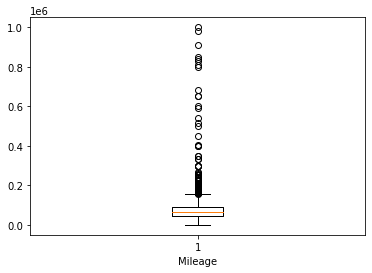

In [56]:
for col in numerical_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(x_train[col])
    ax.set_xlabel(col)
    plt.show()

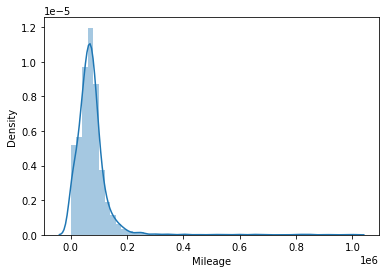

In [57]:
for col in numerical_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = sn.distplot(x_train[col])
    ax.set_xlabel(col)
    plt.show()

**From the boxplot and distplot for independent numerical feature *Mileage*, we observe that the data distribution is right skewed. It is skewed because of the presence of few records of cars with more mileage than most of the cars in records. So instead of removing those records, we will try to reduce the skewness and make it normal distribution.**

In [58]:
x_train.dtypes

Model          object
Fuel Type      object
Mileage       float64
Owner          object
Location       object
Year built     object
dtype: object

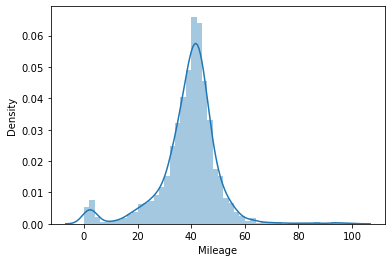

In [59]:
for col in numerical_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = sn.distplot(np.cbrt(x_train[col]))
    ax.set_xlabel(col)
    plt.show()

**After cuberoot transformation of numerical feature *Mileage*, we observe the distribution of data is transformed from right skewed to normal distribution. So we will choose cuberoot transformation to handle outlier values and to remove skewness.**

In [60]:
x_train

,Model,Fuel Type,Mileage,Owner,Location,Year built
1530,Renault Triber,--,15001.0,--,Kochi,2020
2428,Mahindra Thar,DIESEL,70000.0,--,Kolhapur,2018
3197,Hyundai Verna,DIESEL,78500.0,1,Jalandhar,2013
3463,Tata Zest,PETROL,61000.0,1,Jaipur,2015
4420,Mahindra Xylo,DIESEL,52300.0,1,Chennai,2019
...,...,...,...,...,...,...
4645,Bmw 3 Series Gt,DIESEL,57000.0,3,Noida,2016
473,Mahindra Scorpio,DIESEL,52000.0,1,Delhi,2018
3184,Maruti Suzuki Omni,PETROL,12209.0,1,Bhikhiwind,2009
3917,Toyota Innova,DIESEL,127000.0,1,Hyderabad,2012


In [61]:
x_train['Mileage'] = np.cbrt(x_train['Mileage'])

In [62]:
x_train

,Model,Fuel Type,Mileage,Owner,Location,Year built
1530,Renault Triber,--,24.662669,--,Kochi,2020
2428,Mahindra Thar,DIESEL,41.212853,--,Kolhapur,2018
3197,Hyundai Verna,DIESEL,42.817689,1,Jalandhar,2013
3463,Tata Zest,PETROL,39.364972,1,Jaipur,2015
4420,Mahindra Xylo,DIESEL,37.396753,1,Chennai,2019
...,...,...,...,...,...,...
4645,Bmw 3 Series Gt,DIESEL,38.485011,3,Noida,2016
473,Mahindra Scorpio,DIESEL,37.325112,1,Delhi,2018
3184,Maruti Suzuki Omni,PETROL,23.026435,1,Bhikhiwind,2009
3917,Toyota Innova,DIESEL,50.265257,1,Hyderabad,2012


In [63]:
x_train.dtypes

Model          object
Fuel Type      object
Mileage       float64
Owner          object
Location       object
Year built     object
dtype: object

#### Filling missing values

In [64]:
x_train.isin(['--']).sum()

Model           0
Fuel Type      31
Mileage         0
Owner         116
Location        0
Year built      0
dtype: int64

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='--',strategy='most_frequent')

In [66]:
x_train['Fuel Type'] = imputer.fit_transform(x_train['Fuel Type'].values.reshape(-1,1))
x_train['Owner'] = imputer.fit_transform(x_train['Owner'].values.reshape(-1,1))

In [67]:
x_train.isin(['--']).sum()

Model         0
Fuel Type     0
Mileage       0
Owner         0
Location      0
Year built    0
dtype: int64

In [68]:
x_train.dtypes

Model          object
Fuel Type      object
Mileage       float64
Owner          object
Location       object
Year built     object
dtype: object

**We have removed the missing values from the dataset which were in the format of '--'.**

#### Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
x_train.head(3)

,Model,Fuel Type,Mileage,Owner,Location,Year built
1530,Renault Triber,DIESEL,24.662669,1,Kochi,2020
2428,Mahindra Thar,DIESEL,41.212853,1,Kolhapur,2018
3197,Hyundai Verna,DIESEL,42.817689,1,Jalandhar,2013


In [71]:
x_train.dtypes

Model          object
Fuel Type      object
Mileage       float64
Owner          object
Location       object
Year built     object
dtype: object

In [72]:
cat_cols = []
for col in x_train.columns:
    if x_train[col].dtypes == 'object':
        cat_cols.append(col)
cat_cols

['Model', 'Fuel Type', 'Owner', 'Location', 'Year built']

In [73]:
for col in cat_cols:
    x_train[col] = le.fit_transform(x_train[col].astype(str))
x_train

,Model,Fuel Type,Mileage,Owner,Location,Year built
1530,207,2,24.662669,0,224,37
2428,123,2,41.212853,0,229,35
3197,94,2,42.817689,0,185,30
3463,243,5,39.364972,0,181,32
4420,128,2,37.396753,0,84,36
...,...,...,...,...,...,...
4645,12,2,38.485011,2,329,33
473,122,2,37.325112,0,108,35
3184,146,5,23.026435,0,58,26
3917,252,2,50.265257,0,169,29


### Features Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [75]:
for col in x_train.columns:
    x_train[col] = s.fit_transform(x_train[col].values.reshape(-1,1))

In [76]:
x_train.head(3)

,Model,Fuel Type,Mileage,Owner,Location,Year built
1530,1.095752,-0.781377,-1.284257,-0.66198,0.166387,1.419557
2428,-0.157923,-0.781377,0.196016,-0.66198,0.203561,1.020057
3197,-0.590740,-0.781377,0.339555,-0.66198,-0.123564,0.021307


### Modelling

In [77]:
# for linear regression
from sklearn.linear_model import LinearRegression
# for metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [78]:
from sklearn.model_selection import cross_val_score

#### cross validation scores for linear regressor

In [80]:
lr= LinearRegression()
lr_cv = cross_val_score(lr, x_train, y_train, cv=10)

print('\n The absolute mean score we got from 10-Fold CV:',np.mean(lr_cv))


 The absolute mean score we got from 10-Fold CV: 0.15954503773455872


#### cross validation score for Decision Tree regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dtr = DecisionTreeRegressor()

dtr_cv = cross_val_score(dtr,x_train,y_train,cv=10)

print('\n The absolute mean score we got from 10-Fold CV:',np.mean(dtr_cv))


 The absolute mean score we got from 10-Fold CV: 0.06370389157544927


#### cross validation score for Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

rfr_cross_val=[]
rfr_n_estimators=[]

for i in range(10,50):
    rfr=RandomForestRegressor(n_estimators=i)
    rfr_n_estimators.append(i)
    rfr_cross_val.append(cross_val_score(rfr,x_train,y_train,cv=10).mean())
    
rf_cv=pd.DataFrame({})
rf_cv["RF CV Score"]=rfr_cross_val
rf_cv['n estimator']=rfr_n_estimators

rf_cv.max()

RF CV Score     0.593566
n estimator    49.000000
dtype: float64

#### comparing cross val scores

In [83]:
results1=[]
results1.clear()
results1.append(lr_cv)
results1.append(dtr_cv)
results1.append(rf_cv['RF CV Score'])

names1=[]
names1.clear()
names1.append("Linear Regression")
names1.append("Decision Tree Regressor")
names1.append("Random Forest Regressor")

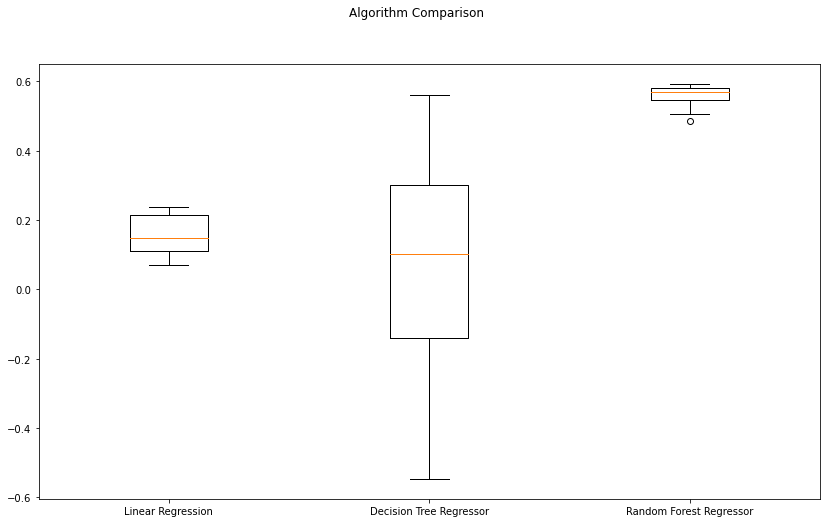

In [84]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

**We will go ahead with Random Forest Regressor.**

In [86]:
from sklearn.model_selection import GridSearchCV

model=RandomForestRegressor()

param={'n_estimators':[10,50,100]}

grid=GridSearchCV(estimator=model,param_grid=param)

grid.fit(x_train,y_train)

print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

0.5197505977809366
100
{'n_estimators': 100}


### Testing

In [89]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
x_test.shape

(1478, 6)

In [91]:
for i in x_test['Mileage'].index:
    if ',' in x_test['Mileage'][i].split(' ')[0]:
        x_test['Mileage'][i] = x_test['Mileage'][i].split(' ')[0].replace(',','')
    else:
        x_test['Mileage'][i] = x_test['Mileage'][i].split(' ')[0]
x_test['Mileage'].head(3)

4172    128005.0
3118       40000
1951     36766.0
Name: Mileage, dtype: object

In [92]:
for i in y_test.index:
    if ',' in y_test[i]:
        y_test[i] = y_test[i].split(' ')[-1].replace(',','')
    else:
        y_test[i] = y_test[i].split(' ')[-1]
y_test

4172    1820000
3118     700000
1951     420000
595      185000
4454     460000
         ...   
285      885000
981      330000
2780     130000
1853    2650000
2717     120000
Name: Price, Length: 1478, dtype: object

In [93]:
x_test['Mileage'] = pd.to_numeric(x_test['Mileage'])

In [94]:
y_test = pd.to_numeric(y_test)

In [95]:
built_year = []
for i in x_test.index:
    built_year.append(x_test['Model'][i].split('(')[-1].split(')')[0])
    x_test['Model'][i] = x_test['Model'][i].split('(')[0]
x_test['Year built'] = built_year

In [96]:
x_test.columns

Index(['Model', 'Fuel Type', 'Mileage', 'Owner', 'Location', 'Year built'], dtype='object')

In [97]:
for i in x_test.index:
    x_test['Location'][i] = x_test['Location'][i].split(',')[-1].strip()

In [99]:
for i in x_test.index:
    if x_test['Owner'][i] in ('1st','First') :
        x_test['Owner'][i] = 1
    elif x_test['Owner'][i] in ('2nd','Second'):
        x_test['Owner'][i] = 2
    elif x_test['Owner'][i] == '3rd':
        x_test['Owner'][i] = 3
    elif x_test['Owner'][i] == '4th':
        x_test['Owner'][i] = 4
    elif x_test['Owner'][i] == '4+':
        x_test['Owner'][i] = 5

In [100]:
numerical_cols = []
for col in x_test.columns:
    if x_test[col].dtypes != 'object':
        numerical_cols.append(col)
print("Numerical columns: {}".format(numerical_cols))

Numerical columns: ['Mileage']


In [101]:
x_test['Mileage'] = np.cbrt(x_test['Mileage'])

In [103]:
x_test['Fuel Type'] = imputer.fit_transform(x_test['Fuel Type'].values.reshape(-1,1))
x_test['Owner'] = imputer.fit_transform(x_test['Owner'].values.reshape(-1,1))

In [105]:
cat_cols = []
for col in x_test.columns:
    if x_test[col].dtypes == 'object':
        cat_cols.append(col)
cat_cols

['Model', 'Fuel Type', 'Owner', 'Location', 'Year built']

In [107]:
for col in cat_cols:
    x_test[col] = le.fit_transform(x_test[col].astype(str))

In [109]:
for col in x_test.columns:
    x_test[col] = s.fit_transform(x_test[col].values.reshape(-1,1))

In [113]:
y_pred = regressor.predict(x_test)

In [114]:
df_result = pd.DataFrame({'Real':y_test,'Predicted':y_pred})
df_result

,Real,Predicted
4172,1820000,1916749.91
3118,700000,1767338.01
1951,420000,353213.00
595,185000,196549.00
4454,460000,542360.00
...,...,...
285,885000,509705.03
981,330000,376432.25
2780,130000,326019.99
1853,2650000,2050963.33


In [ ]:
# pipeline
# estimators = []
# estimators.append(('imputer',imputer))
# estimators.append(('encoder',le))
# estimators.append(('scaler',s))